#### Import the necessary libraries.

In [89]:
import pandas                             as      pd
import numpy                              as      np
import matplotlib.pyplot                  as      plt
import seaborn                            as      sns
from   IPython.display                    import  display
from   pylab                              import  rcParams 
from   datetime                           import  datetime, timedelta
from statsmodels.tsa.stattools            import  adfuller
from statsmodels.tsa.stattools            import  pacf
from statsmodels.tsa.stattools            import  acf
from statsmodels.graphics.tsaplots        import  plot_pacf
from statsmodels.graphics.tsaplots        import  plot_acf
from statsmodels.graphics.gofplots        import  qqplot
from statsmodels.tsa.seasonal             import  seasonal_decompose
#from statsmodels.tsa.arima_model          import  ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax   import  SARIMAX
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Read the data set in a Time Series with proper Time frequency or period.

In [90]:
df = pd.read_csv('MaunaLoa.csv',parse_dates=['Year-Month'],index_col='Year-Month')
df.head(15)

,CO2 ppm
Year-Month,
1965-01-01,319.32
1965-02-01,320.36
1965-03-01,320.82
1965-04-01,322.06
1965-05-01,322.17
1965-06-01,321.95
1965-07-01,321.20
1965-08-01,318.81
1965-09-01,317.82


# Plot the Time Series Data.

In [91]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

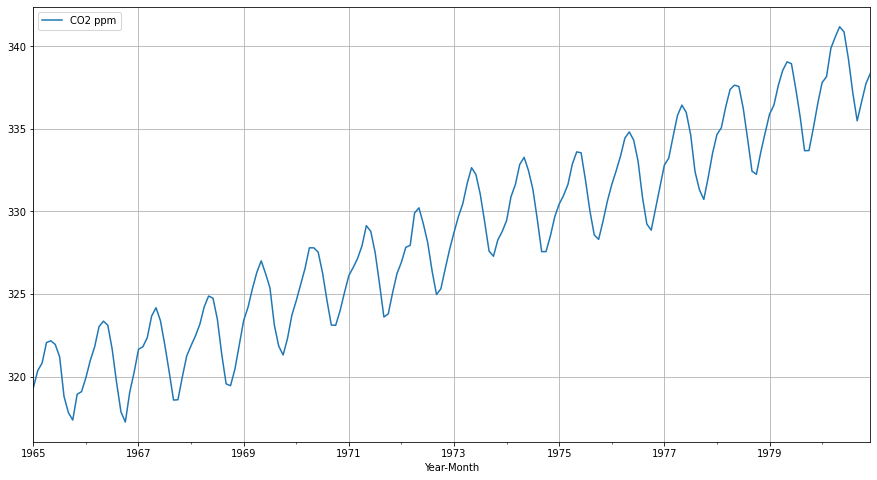

In [92]:
df.plot();
plt.grid()

# Plot a boxplot to understand the variation of Carbon Dioxide in parts per million with respect to months across years.

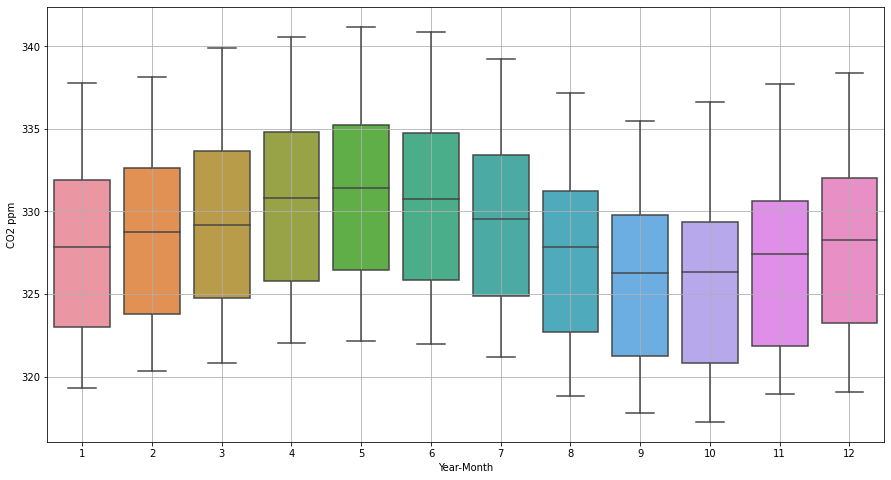

In [93]:
sns.boxplot(x=df.index.month,y=df['CO2 ppm'])
plt.grid();

# Plot a graph of monthly Carbon Dioxide in parts per million across years.

In [94]:
monthly_co2ppm_across_years = pd.pivot_table(df, values = 'CO2 ppm', columns = df.index.year, index = df.index.month_name())
monthly_co2ppm_across_years

Year-Month,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980
Year-Month,,,,,,,,,,,,,,,,
April,322.06,323.03,323.67,324.23,326.31,327.80,327.92,329.91,331.69,332.85,332.87,334.45,335.82,337.39,338.54,340.57
August,318.81,319.64,320.29,321.34,323.12,324.63,325.62,326.39,329.36,329.53,330.05,330.87,332.41,334.39,335.71,337.19
December,319.09,320.26,321.25,321.92,323.72,325.09,326.25,327.71,328.79,329.69,330.63,331.50,333.53,334.76,336.53,338.36
February,320.36,320.98,321.81,322.47,324.21,325.57,326.61,327.83,329.69,330.89,330.97,332.46,333.23,335.07,336.44,338.16
January,319.32,319.94,321.65,321.88,323.40,324.60,326.12,326.93,328.73,329.45,330.45,331.63,332.81,334.66,335.89,337.81
July,321.20,321.65,321.93,323.47,325.37,326.28,327.52,328.11,331.03,331.34,331.90,333.05,334.65,336.25,337.41,339.25
June,321.95,323.11,323.39,324.75,326.24,327.54,328.80,329.25,332.24,332.47,333.55,334.32,335.99,337.57,338.95,340.87
March,320.82,321.81,322.36,323.17,325.33,326.55,327.16,327.95,330.47,331.63,331.64,333.36,334.55,336.33,337.63,339.88
May,322.17,323.36,324.17,324.88,327.01,327.80,329.14,330.22,332.65,333.28,333.61,334.82,336.44,337.65,339.06,341.19


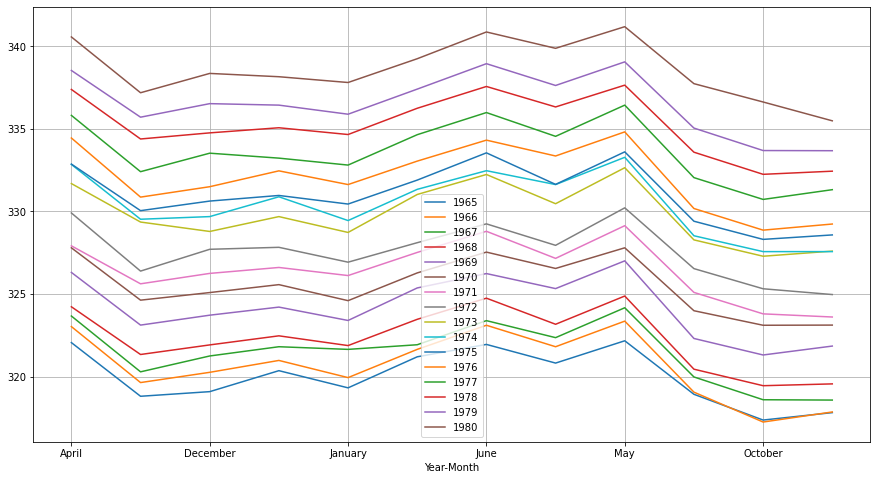

In [95]:
monthly_co2ppm_across_years.plot()
plt.grid()
plt.legend(loc='best');

# Decompose the Time Series to understand the various components.

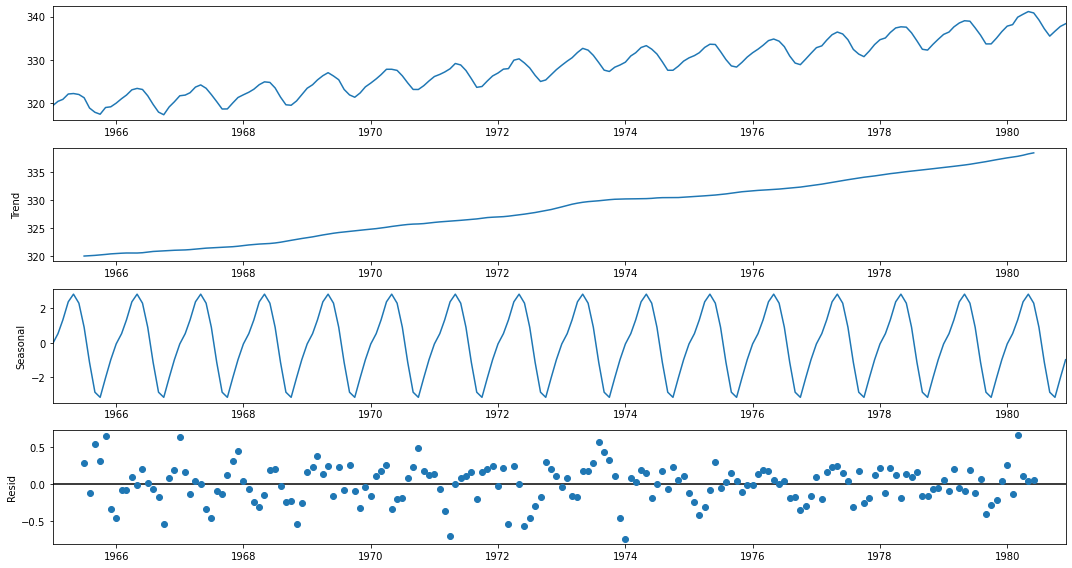

In [96]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

## stationarity test

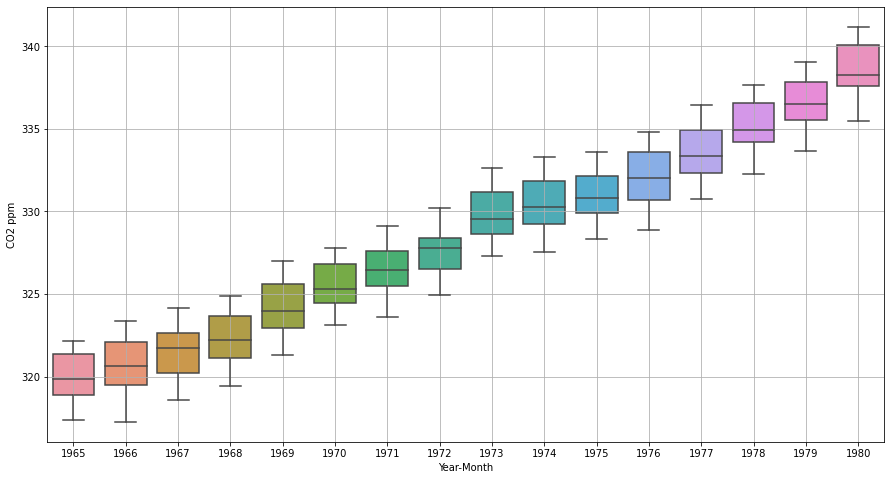

In [97]:
sns.boxplot(x=df.index.year,y=df['CO2 ppm'])
plt.grid();

In [98]:
observations= df.values
test_result = adfuller(observations)

In [99]:
test_result

(1.2696771490032224,
 0.9964336403294772,
 12,
 179,
 {'1%': -3.4674201432469816,
  '5%': -2.877826051844538,
  '10%': -2.575452082332012},
 144.00145013189143)

## applying differencing

In [100]:
df_diff = df.diff(periods=1).dropna()
observations= df_diff.values
test_result = adfuller(observations)
test_result

(-4.750106971676851,
 6.768699865173864e-05,
 11,
 179,
 {'1%': -3.4674201432469816,
  '5%': -2.877826051844538,
  '10%': -2.575452082332012},
 144.25602170016555)

# Check the ACF and PACF of the training data.

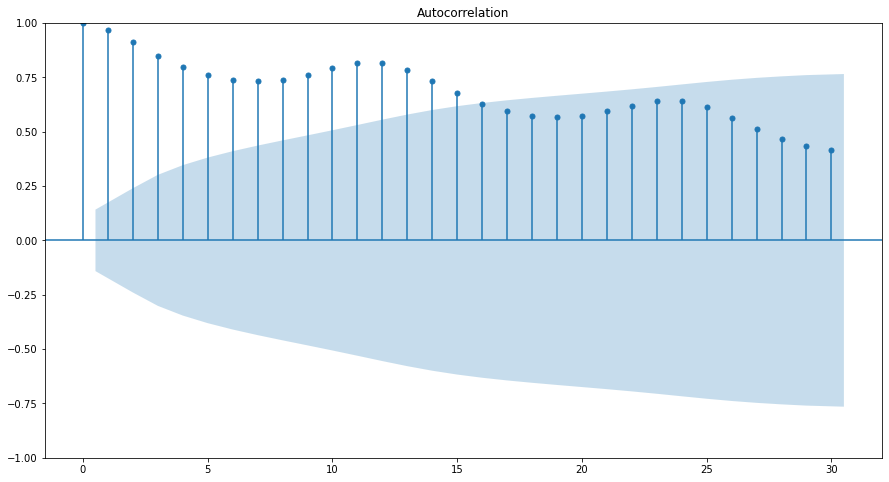

In [101]:
plot_acf(df,lags=30);

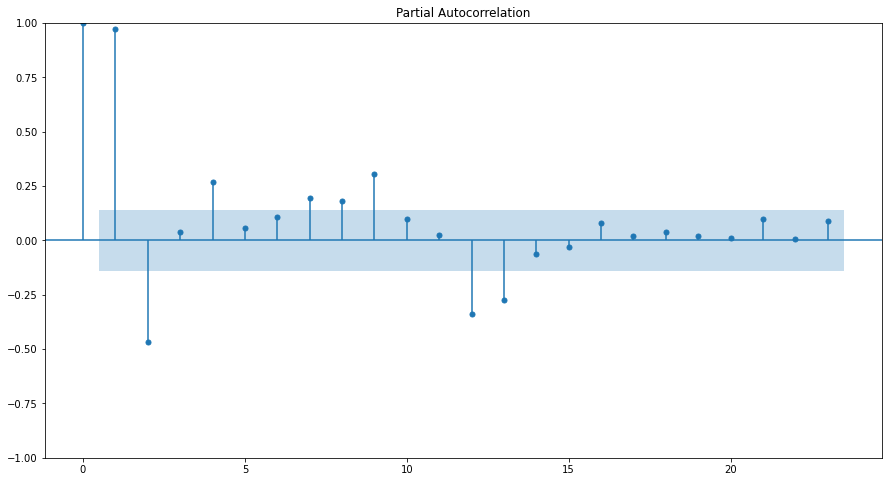

In [102]:
plot_pacf(df);

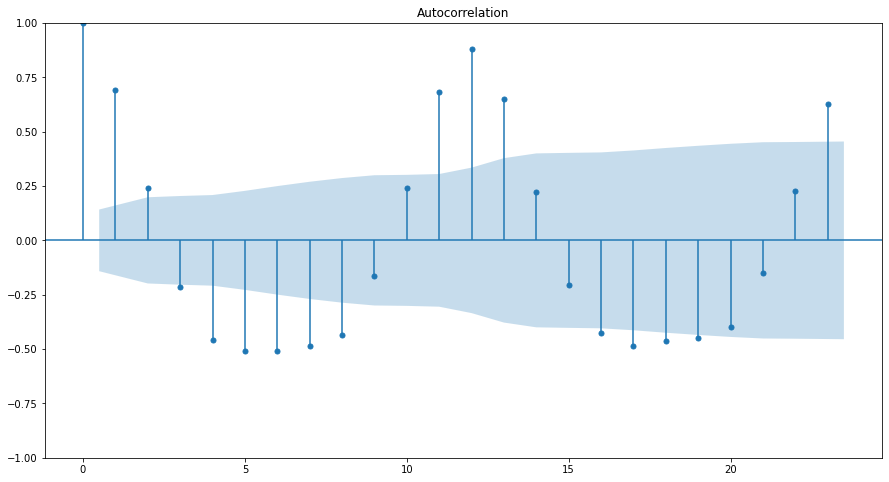

In [103]:
plot_acf(df_diff);

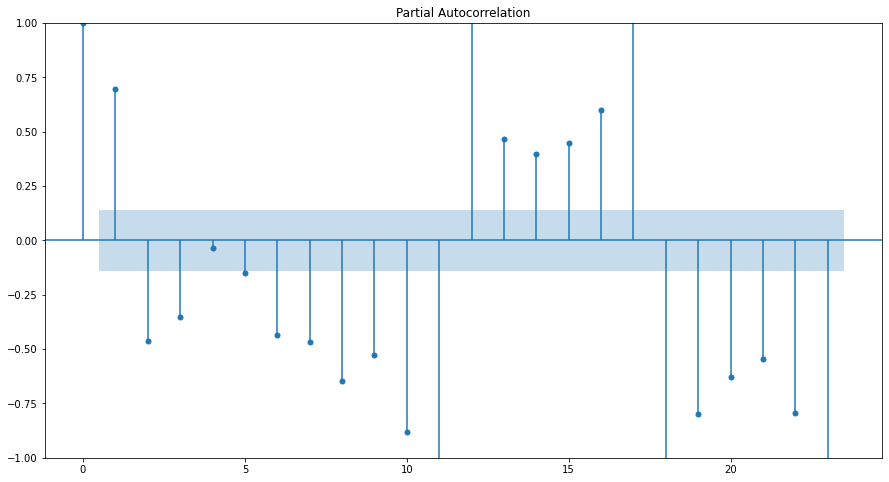

In [104]:
plot_pacf(df_diff);

## Train-Test split

In [105]:
train_end=datetime(1978,12,1)
test_end=datetime(1980,12,1)

In [106]:
train             = df[:train_end] 
test              = df[train_end + timedelta(days=1):test_end]

## Selecting an order of ARIMA model for data with the lowest Akaike Information Criteria (AIC). 

In [107]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('parameter combinations for the Model')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

parameter combinations for the Model
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [108]:
dfObj1 = pd.DataFrame(columns=['param', 'AIC'])
dfObj1

,param,AIC


In [109]:
for param in pdq:
            try:
                mod = ARIMA(train, order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                dfObj1 = dfObj1.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

ARIMA(0, 1, 0) - AIC:521.6866087381227
ARIMA(0, 1, 1) - AIC:427.2089971236799
ARIMA(0, 1, 2) - AIC:386.71116114025926
ARIMA(0, 1, 3) - AIC:370.1183497636364
ARIMA(1, 1, 0) - AIC:412.1550050106317
ARIMA(1, 1, 1) - AIC:394.2494988510245
ARIMA(1, 1, 2) - AIC:379.5240045466983
ARIMA(1, 1, 3) - AIC:372.0013093529383
ARIMA(2, 1, 0) - AIC:373.2794540954644
ARIMA(2, 1, 1) - AIC:332.32841192201295
ARIMA(2, 1, 2) - AIC:333.9885262034079
ARIMA(2, 1, 3) - AIC:336.23080880420673
ARIMA(3, 1, 0) - AIC:356.01656397685235
ARIMA(3, 1, 1) - AIC:334.0121904477379
ARIMA(3, 1, 2) - AIC:335.5236233647461
ARIMA(3, 1, 3) - AIC:337.0482811392801


In [110]:
dfObj1.sort_values(by=['AIC'])

,param,AIC
9,"(2, 1, 1)",332.328412
10,"(2, 1, 2)",333.988526
13,"(3, 1, 1)",334.012190
14,"(3, 1, 2)",335.523623
11,"(2, 1, 3)",336.230809
15,"(3, 1, 3)",337.048281
12,"(3, 1, 0)",356.016564
3,"(0, 1, 3)",370.118350
7,"(1, 1, 3)",372.001309
8,"(2, 1, 0)",373.279454


In [111]:
model = ARIMA(train, order=(2,1,3))

results_Arima = model.fit()

print(results_Arima.summary())

                               SARIMAX Results                                
Dep. Variable:                CO2 ppm   No. Observations:                  168
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -162.115
Date:                Fri, 16 Dec 2022   AIC                            336.231
Time:                        21:00:27   BIC                            354.939
Sample:                    01-01-1965   HQIC                           343.824
                         - 12-01-1978                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4422      0.089     16.157      0.000       1.267       1.617
ar.L2         -0.7611      0.089     -8.548      0.000      -0.936      -0.587
ma.L1         -0.7110      0.124     -5.745      0.0

# Predict on the Test Set using this model and evaluate the model on the test set using RMSE and MAPE

In [112]:
pred_start=test.index[0]
pred_end=test.index[-1]

In [113]:
ARIMA_predictions=results_Arima.predict(start=pred_start, end=pred_end)

In [114]:
ARIMA_predictions

1979-01-01    335.746732
1979-02-01    336.092913
1979-03-01    335.948025
1979-04-01    335.475580
1979-05-01    334.904519
1979-06-01    334.440561
1979-07-01    334.206121
1979-08-01    334.221162
1979-09-01    334.421299
1979-10-01    334.698478
1979-11-01    334.945881
1979-12-01    335.091701
1980-01-01    335.113686
1980-02-01    335.034401
1980-03-01    334.903325
1980-04-01    334.774642
1980-05-01    334.688827
1980-06-01    334.663017
1980-07-01    334.691111
1980-08-01    334.751274
1980-09-01    334.816653
1980-10-01    334.865149
1980-11-01    334.885323
1980-12-01    334.877505
Freq: MS, Name: predicted_mean, dtype: float64

In [115]:
ARIMA_pred=ARIMA_predictions.cumsum()
#ARIMA_pred

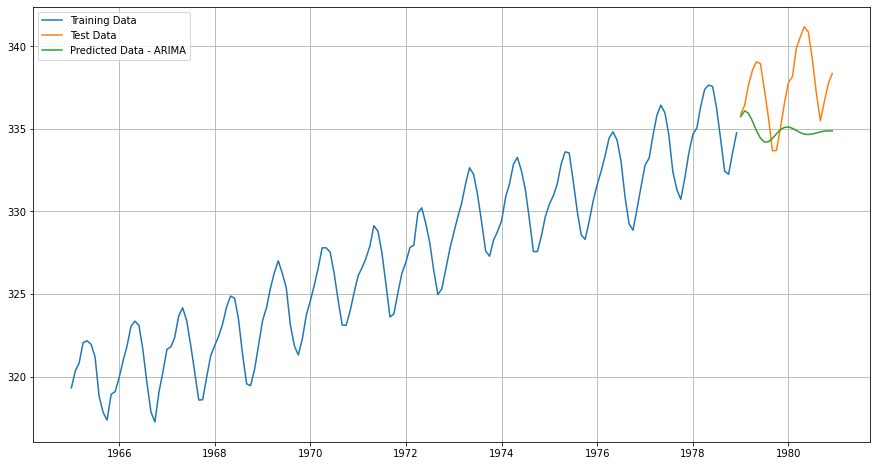

In [116]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,ARIMA_predictions,label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

In [117]:
test.columns

Index(['CO2 ppm'], dtype='object')

In [118]:
test.head()

,CO2 ppm
Year-Month,
1979-01-01,335.89
1979-02-01,336.44
1979-03-01,337.63
1979-04-01,338.54
1979-05-01,339.06


In [119]:
ARIMA_predictions.head()

1979-01-01    335.746732
1979-02-01    336.092913
1979-03-01    335.948025
1979-04-01    335.475580
1979-05-01    334.904519
Freq: MS, Name: predicted_mean, dtype: float64

In [120]:
ARIMA_predictions_df = pd.DataFrame(ARIMA_predictions)

In [121]:
ARIMA_predictions_df.head()

,predicted_mean
1979-01-01,335.746732
1979-02-01,336.092913
1979-03-01,335.948025
1979-04-01,335.475580
1979-05-01,334.904519


In [122]:
ARIMA_predictions_df['predicted_mean']

1979-01-01    335.746732
1979-02-01    336.092913
1979-03-01    335.948025
1979-04-01    335.475580
1979-05-01    334.904519
1979-06-01    334.440561
1979-07-01    334.206121
1979-08-01    334.221162
1979-09-01    334.421299
1979-10-01    334.698478
1979-11-01    334.945881
1979-12-01    335.091701
1980-01-01    335.113686
1980-02-01    335.034401
1980-03-01    334.903325
1980-04-01    334.774642
1980-05-01    334.688827
1980-06-01    334.663017
1980-07-01    334.691111
1980-08-01    334.751274
1980-09-01    334.816653
1980-10-01    334.865149
1980-11-01    334.885323
1980-12-01    334.877505
Freq: MS, Name: predicted_mean, dtype: float64

In [123]:
residuals = test['CO2 ppm'] - ARIMA_predictions_df['predicted_mean']

 

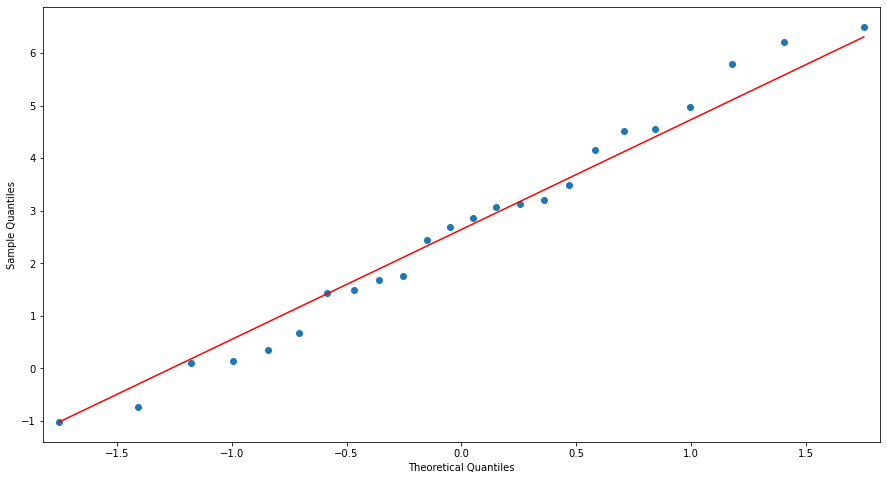

In [124]:
qqplot(residuals,line="s");

In [125]:
from sklearn.metrics import  mean_squared_error

rmse = mean_squared_error(test['CO2 ppm'],ARIMA_predictions_df['predicted_mean'], squared=False)
 
print(rmse)

3.371770506606991


In [126]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [127]:
mape=MAPE(test['CO2 ppm'].values,ARIMA_predictions_df['predicted_mean'].values)
print(mape)

0.8234293516746082


## SARIMA Model

### we will find the model parameters based on AIC criteria. Parameters will be  generated using combination for the given range.

In [128]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 1)(0, 1, 2, 12)
Model: (0, 1, 2)(1, 1, 0, 12)
Model: (0, 1, 2)(1, 1, 1, 12)


### Creating an empty Dataframe with column names only where the model and AIC scores will be saved

In [129]:
dfObj2 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
dfObj2

,param,seasonal,AIC


In [130]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = mod.fit()
        print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfObj2 = dfObj2.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:169.5026390080524
SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:76.60024513106538
SARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:63.668610704536704
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:101.77574384550147
SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:73.06883156314025
SARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:63.39376878404886
SARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:78.32111628951127
SARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:64.7713520537352
SARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:64.0921131510954
SARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:165.13652038660632
SARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:66.2925068981281
SARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:62.33158586070941
SARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:98.4577031121515
SARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:64.95051921007558
SARIMA(0, 1, 1)x(1, 1, 2, 12)12 - AIC:60.48473972992478
SARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:76.1432098087794
SARIMA(0, 1, 1)x(2, 1, 1, 12)12 - AIC:59.415580794585054
SARIMA(0, 1, 1)x(2, 1, 2, 12)12 - AIC:63.91645406

### Sorting parameters for best AIC score

In [131]:
dfObj2.sort_values(by=['AIC'])

,param,seasonal,AIC
29,"(1, 1, 0)","(0, 1, 2, 12)",59.094377
16,"(0, 1, 1)","(2, 1, 1, 12)",59.415581
32,"(1, 1, 0)","(1, 1, 2, 12)",59.504680
14,"(0, 1, 1)","(1, 1, 2, 12)",60.484740
56,"(2, 1, 0)","(0, 1, 2, 12)",60.946225
...,...,...,...
18,"(0, 1, 2)","(0, 1, 0, 12)",165.522024
63,"(2, 1, 1)","(0, 1, 0, 12)",165.632730
27,"(1, 1, 0)","(0, 1, 0, 12)",166.711967
54,"(2, 1, 0)","(0, 1, 0, 12)",167.606179


In [132]:
model = sm.tsa.statespace.SARIMAX(train,
                                order=(1,1,0),
                                seasonal_order=(1,1,2,12),
                                )
model_Sarima = model.fit()
print(model_Sarima.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                 CO2 ppm   No. Observations:                  168
Model:             SARIMAX(1, 1, 0)x(1, 1, [1, 2], 12)   Log Likelihood                 -42.065
Date:                                 Fri, 16 Dec 2022   AIC                             94.131
Time:                                         21:01:35   BIC                            109.348
Sample:                                     01-01-1965   HQIC                           100.312
                                          - 12-01-1978                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2664      0.072     -3.699      0.000      -0.408      -0

In [133]:
SARIMA_predictions=model_Sarima.predict(start=pred_start, end=pred_end)

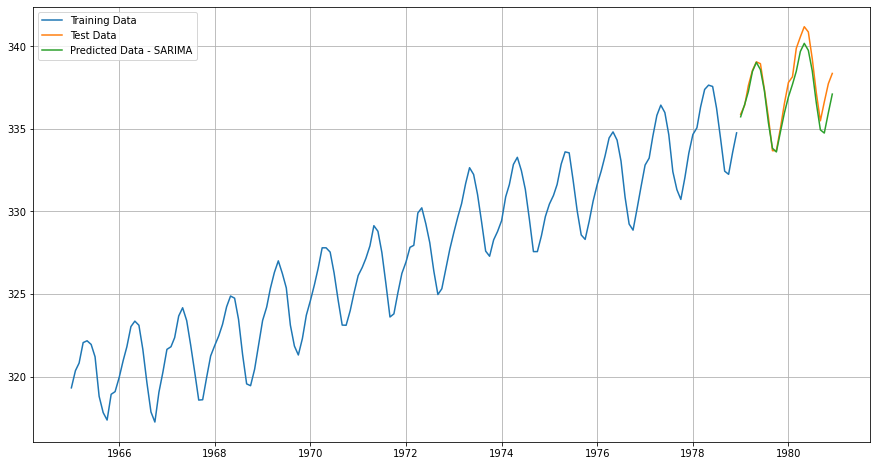

In [134]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,SARIMA_predictions,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

### finding RSMA and MAPE

In [135]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['CO2 ppm'],SARIMA_predictions, squared=False)
print(rmse)

0.8213789499910458


In [136]:
mape = MAPE(test['CO2 ppm'],SARIMA_predictions)
print(mape)

0.18461311230296018


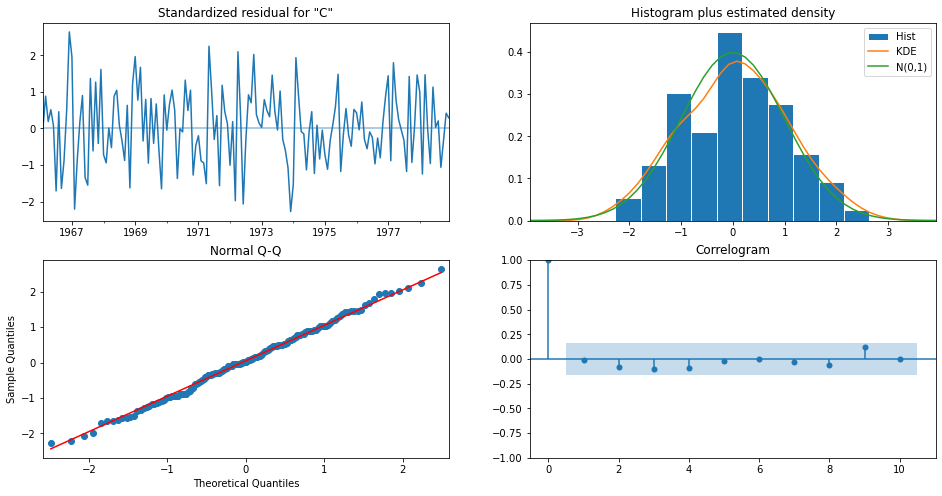

In [137]:
model_Sarima.plot_diagnostics(figsize=(16, 8))
plt.show()

## fitting model on whole data

In [138]:
model = sm.tsa.statespace.SARIMAX(df,
                                order=(1,1,0),
                                seasonal_order=(1,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
model_Sarima = model.fit()
print(model_Sarima.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                 CO2 ppm   No. Observations:                  192
Model:             SARIMAX(1, 1, 0)x(1, 1, [1, 2], 12)   Log Likelihood                 -39.857
Date:                                 Fri, 16 Dec 2022   AIC                             89.714
Time:                                         21:01:36   BIC                            104.899
Sample:                                     01-01-1965   HQIC                            95.882
                                          - 12-01-1980                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2668      0.085     -3.120      0.002      -0.434      -0

# Forecast with confidence interval

In [139]:
forecast = model_Sarima.forecast(steps=24)

In [140]:
forecast

1981-01-01    339.589037
1981-02-01    340.167598
1981-03-01    341.227873
1981-04-01    342.311254
1981-05-01    342.846994
1981-06-01    342.507077
1981-07-01    341.130712
1981-08-01    339.208836
1981-09-01    337.517373
1981-10-01    337.486304
1981-11-01    338.716824
1981-12-01    339.895359
1982-01-01    340.994987
1982-02-01    341.593296
1982-03-01    342.692636
1982-04-01    343.751765
1982-05-01    344.284442
1982-06-01    343.940750
1982-07-01    342.554429
1982-08-01    340.615463
1982-09-01    338.924181
1982-10-01    338.987696
1982-11-01    340.205041
1982-12-01    341.323481
Freq: MS, Name: predicted_mean, dtype: float64

In [141]:
pred95 = model_Sarima.get_forecast(steps=24)

In [142]:
pred95=pred95.conf_int()

In [143]:
pred95

,lower CO2 ppm,upper CO2 ppm
1981-01-01,338.986505,340.191568
1981-02-01,339.420455,340.914740
1981-03-01,340.337379,342.118367
1981-04-01,341.302865,343.319642
1981-05-01,341.731827,343.962161
1981-06-01,341.294816,343.719339
1981-07-01,339.828498,342.432926
1981-08-01,337.822512,340.595159
1981-09-01,336.051755,338.982991
1981-10-01,335.945468,339.027141


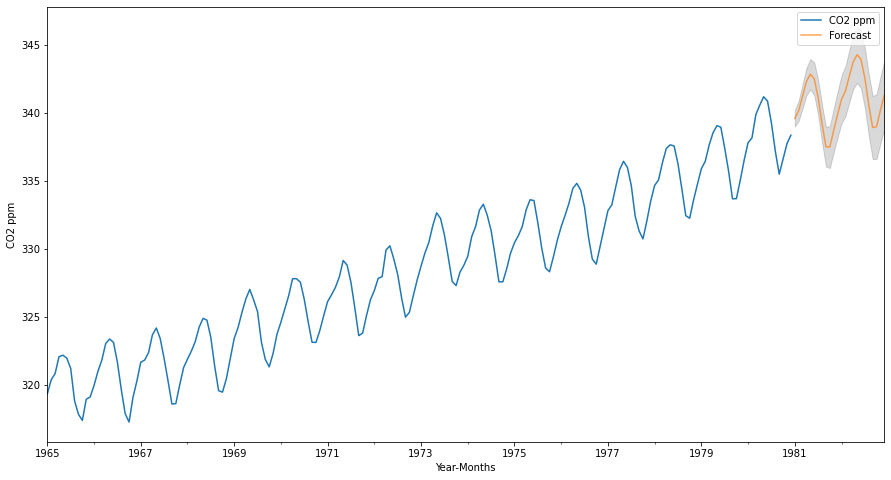

In [144]:
axis = df.plot(label='Observed', figsize=(15, 8))
forecast.plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(forecast.index, pred95['lower CO2 ppm'], pred95['upper CO2 ppm'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('CO2 ppm')
plt.legend(loc='best')
plt.show()

# END